### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [54]:
### Data Collection
#Here also we are extracting the stock data using pandas data reader but with a specified source called 'Tiingo'.
#Tiingo is a tracing platform that provides a data api key with which we can retrieve historical stock prices


import pandas_datareader as pdr
key="e368c6883f230ee9016532e15fab62878cd1b633"

In [55]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [57]:
df.to_csv('AAPL.csv')

In [56]:
import pandas as pd

In [58]:
df=pd.read_csv('AAPL.csv')

In [59]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-20 00:00:00+00:00,107.13,108.09,106.06,106.64,30611030,24.906304,25.129491,24.657543,24.792386,122444120,0.0,1.0
1,AAPL,2016-04-21 00:00:00+00:00,105.97,106.93,105.52,106.93,31552525,24.636619,24.859807,24.532000,24.859807,126210100,0.0,1.0
2,AAPL,2016-04-22 00:00:00+00:00,105.68,106.48,104.62,105.01,33683121,24.569198,24.755188,24.322762,24.413432,134732484,0.0,1.0
3,AAPL,2016-04-25 00:00:00+00:00,105.08,105.65,104.51,105.00,28031588,24.429706,24.562224,24.297189,24.411107,112126352,0.0,1.0
4,AAPL,2016-04-26 00:00:00+00:00,104.35,105.30,103.91,103.91,56016165,24.259991,24.480853,24.157697,24.157697,224064660,0.0,1.0


In [60]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-04-13 00:00:00+00:00,134.43,134.66,131.930,132.44,91266545,134.43,134.66,131.930,132.44,91266545,0.0,1.0
1254,AAPL,2021-04-14 00:00:00+00:00,132.03,135.00,131.655,134.94,87222782,132.03,135.00,131.655,134.94,87222782,0.0,1.0
1255,AAPL,2021-04-15 00:00:00+00:00,134.50,135.00,133.640,133.82,89347102,134.50,135.00,133.640,133.82,89347102,0.0,1.0
1256,AAPL,2021-04-16 00:00:00+00:00,134.16,134.67,133.280,134.30,84922386,134.16,134.67,133.280,134.30,84922386,0.0,1.0
1257,AAPL,2021-04-19 00:00:00+00:00,134.84,135.47,133.340,133.51,93771047,134.84,135.47,133.340,133.51,93771047,0.0,1.0


In [61]:
df1=df.reset_index()['close']

In [64]:
df1.shape

(1258,)

In [65]:
df1

0       107.13
1       105.97
2       105.68
3       105.08
4       104.35
         ...  
1253    134.43
1254    132.03
1255    134.50
1256    134.16
1257    134.84
Name: close, Length: 1258, dtype: float64

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [67]:
import numpy as np

In [68]:
df1

0       107.13
1       105.97
2       105.68
3       105.08
4       104.35
         ...  
1253    134.43
1254    132.03
1255    134.50
1256    134.16
1257    134.84
Name: close, Length: 1258, dtype: float64

In [ ]:
#To proceed further we need to scale the data. 
#LSTM are sensitive to the scale of the data. So we apply Minmax scaler where we transform the values between [0 1]

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [70]:
print(df1)

[[0.04038485]
 [0.03759471]
 [0.03689717]
 ...
 [0.10621768]
 [0.10539988]
 [0.10703548]]


In [ ]:
#Then split the data into training and test data by fixing the sizes. 
#Here I gave 0.65 as training size which means 65% of total data is training data and remaining 35% is the test data

In [71]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [72]:
training_size,test_size

(817, 441)

In [73]:
train_data

array([[0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.02422129],
       [0.02407697],
       [0.02289838],
       [0.01953097],
       [0.01775105],
       [0.01823211],
       [0.01993987],
       [0.02090198],
       [0.02068551],
       [0.02239327],
       [0.02042093],
       [0.01683704],
       [0.01712568],
       [0.01635598],
       [0.01734215],
       [0.01200241],
       [0.01144919],
       [0.01339747],
       [0.01253157],
       [0.01385448],
       [0.00736019],
       [0.004

In [74]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#Next step is data preprocessing. 
#We need to set the 'timestep' which is the number of previous days that needs to be considered to predict the future days.

In [75]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [76]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [77]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [78]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# We created stacked LSTM by adding the layers. First 'sequence' model is created and then 3 layers of LSTM are added with a dense layer on last. Making a stacked LSTM model as a whole.
# Fit the data to the model and then predict


In [79]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 22s 598ms/step - loss: 0.0167 - val_loss: 0.0475
Epoch 2/100
12/12 [==============================] - 4s 295ms/step - loss: 0.0027 - val_loss: 0.0261
Epoch 3/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0013 - val_loss: 0.0274
Epoch 4/100
12/12 [==============================] - 3s 261ms/step - loss: 7.6327e-04 - val_loss: 0.0209
Epoch 5/100
12/12 [==============================] - 3s 283ms/step - loss: 4.5775e-04 - val_loss: 0.0199
Epoch 6/100
12/12 [==============================] - 4s 315ms/step - loss: 4.5343e-04 - val_loss: 0.0195
Epoch 7/100
12/12 [==============================] - 4s 303ms/step - loss: 4.2076e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 3s 289ms/step - loss: 3.7258e-04 - val_loss: 0.0185
Epoch 9/100
12/12 [==============================] - 4s 301ms/step - loss: 4.2003e-04 - val_loss: 0.0181
Epoch 10/100
12/12 [==============================] - 4s 301ms/ste

12/12 [==============================] - 3s 291ms/step - loss: 1.3515e-04 - val_loss: 0.0072
Epoch 79/100
12/12 [==============================] - 4s 298ms/step - loss: 1.3207e-04 - val_loss: 0.0069
Epoch 80/100
12/12 [==============================] - 4s 299ms/step - loss: 1.1094e-04 - val_loss: 0.0070
Epoch 81/100
12/12 [==============================] - 4s 302ms/step - loss: 1.1885e-04 - val_loss: 0.0067
Epoch 82/100
12/12 [==============================] - 4s 329ms/step - loss: 1.1620e-04 - val_loss: 0.0066
Epoch 83/100
12/12 [==============================] - 4s 316ms/step - loss: 1.2361e-04 - val_loss: 0.0065
Epoch 84/100
12/12 [==============================] - 4s 322ms/step - loss: 1.1985e-04 - val_loss: 0.0064
Epoch 85/100
12/12 [==============================] - 4s 310ms/step - loss: 1.1195e-04 - val_loss: 0.0064
Epoch 86/100
12/12 [==============================] - 4s 338ms/step - loss: 1.1572e-04 - val_loss: 0.0064
Epoch 87/100
12/12 [==============================] - 4s 30

In [84]:
import tensorflow as tf

In [85]:
tf.__version__

'2.4.1'

In [86]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [87]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Finally rmse is calculated and we plot the graph for better visualizing, 
#orange = training data, blue = total data set, green = test data. 

In [88]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.7352646565796

In [89]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

255.44526494429172

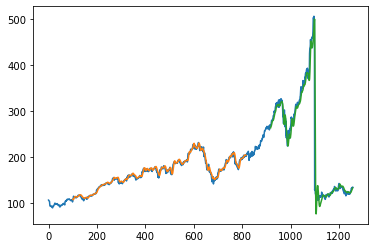

In [111]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [112]:
len(test_data)

441

In [113]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [114]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [115]:
temp_input

[0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533973,
 0.1001082381238

In [122]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.09760673 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721
 0.08851473 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023
 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177 0.10739627
 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839
 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633 0.09508118
 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162 0.09007817
 0.08365604 0.07629585 0.07165364 0.07475646 0.06258569 0.07395069
 0.07129284 0.07605532 0.0738184  0.08093806 0.08473842 0.08279014
 0.07261575 0.0713169  0.07949489 0.07745039 0.07155743 0.07276007
 0.07425135 0.07468431 0.07110042 0.07651233 0.07855683 0.08553217
 0.08627781 0.09034275 0.09625977 0.10259771 0.09837643 0.10604931
 0.10027661 0.10621768 0.10539988 0.10703548 0.10629301 0.10709918
 0.10764384 0.10806264 0.10845733 0.10889174 0.10939984 0.10999548
 0.11068019 0.11144859 0.1122914  0.11319738 0.1141544  0.11515035
 0.11617376 0.11721414 0.11826254 0.11931169 0.1203

7 day output [[0.13935432]]
8 day input [0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028
 0.10306675 0.09741431 0.09469633 0.09508118 0.0857727  0.08543596
 0.08420926 0.07372219 0.07437162 0.09007817 0.08365604 0.07629585
 0.07165364 0.07475646 0.06258569 0.07395069 0.07129284 0.07605532
 0.0738184  0.08093806 0.08473842 0.08279014 0.07261575 0.0713169
 0.07949489 0.07745039 0.07155743 0.07276007 0.07425135 0.07468431
 0.07110042 0.07651233 0.07855683 0.08553217 0.08627781 0.09034275
 0.09625977 0.10259771 0.09837643 0.10604931 0.10027661 0.10621768
 0.10539988 0.10703548 0.10629301 0.10709918 0.10764384 0.10806264
 0.10845733 0.10889174 0.10939984 0.10999548 0.11068019 0.11144859
 0.1122914  0.11319738 0.1141544  0.11515035 0.11617376 0.11721414
 0.11826254 0.11931169 0.12035595 0.12139155 0.12241627 0.12342932
 0.124431   0.12542257 

In [130]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [131]:
import matplotlib.pyplot as plt

In [132]:
len(df1)

1258

In [392]:
# As this is an overall graph lets see a graph of the 100 days we considered. 
#Blue = 100 days of test data, orange = predicted 10 days
#This is a continuous plot of total 110 days

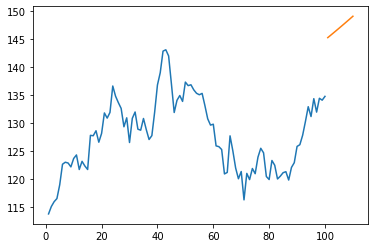

In [133]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

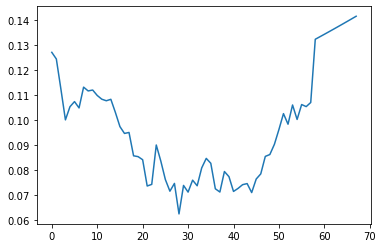

In [134]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [135]:
df3=scaler.inverse_transform(df3).tolist()

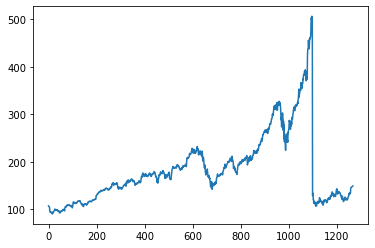

In [136]:
plt.plot(df3)